In [33]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("../../logs/train_metrics_20251018_1705.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,lr,shard_index
0,0,11.035949,11.036964,NaN,0.000000,1409.945040,0.000000e+00,edufineweb_train_000006.npy
1,8,11.014856,NaN,NaN,0.000000,42812.707972,0.000000e+00,edufineweb_train_000010.npy
2,16,11.043348,NaN,NaN,7.396093,30134.446936,7.978723e-07,edufineweb_train_000120.npy
3,24,10.998390,NaN,NaN,7.396093,42821.565111,7.978723e-07,edufineweb_train_000081.npy
4,32,10.963530,NaN,NaN,7.398496,46979.752750,1.595745e-06,edufineweb_train_000084.npy
...,...,...,...,...,...,...,...,...
26541,212328,2.597413,NaN,NaN,0.237764,46130.154934,8.506195e-05,edufineweb_train_000000.npy
26542,212336,2.873787,NaN,NaN,0.243307,46629.139500,8.504335e-05,edufineweb_train_000036.npy
26543,212344,2.914555,NaN,NaN,0.243307,45903.526647,8.504335e-05,edufineweb_train_000093.npy
26544,212352,2.922415,2.991076,NaN,0.265284,46613.198448,8.502475e-05,edufineweb_train_000046.npy


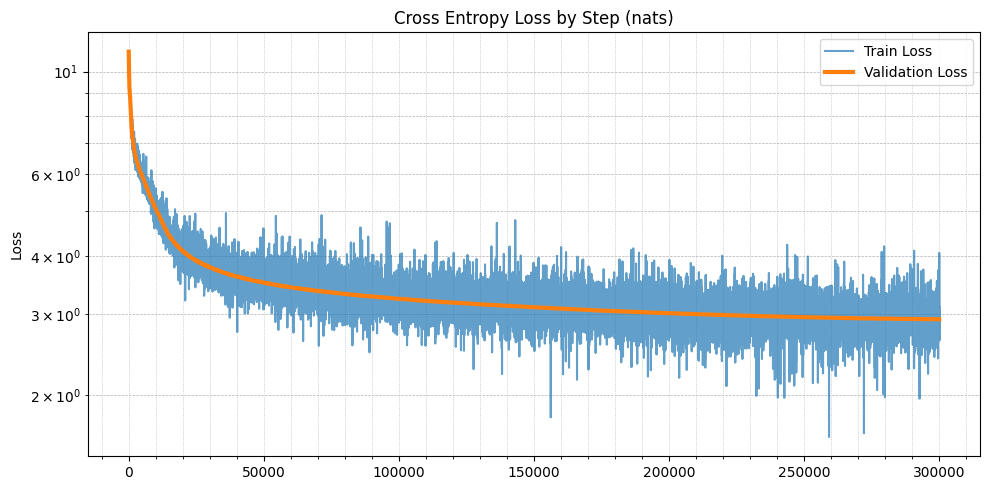

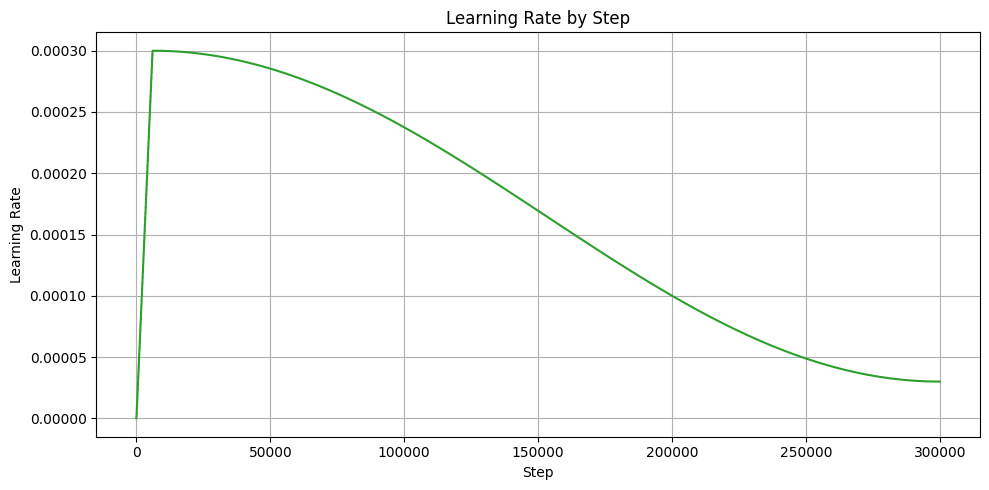

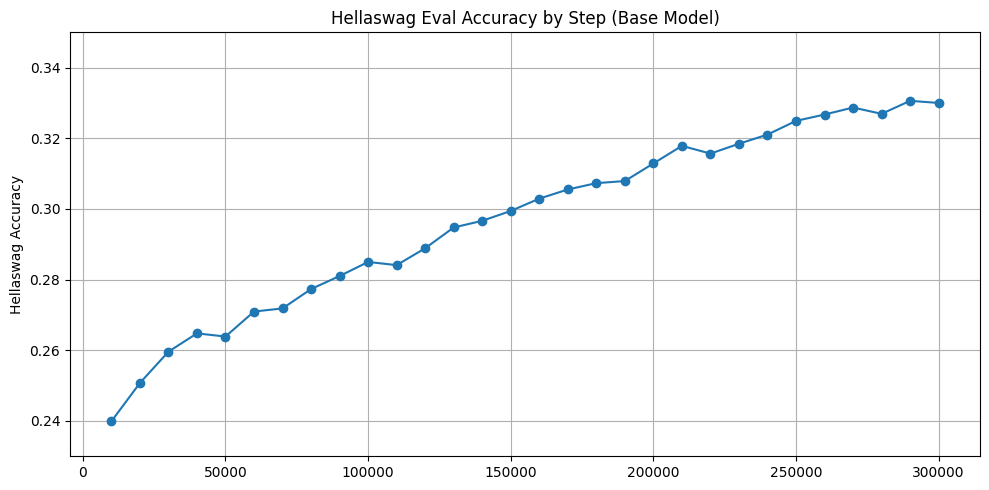

In [5]:
# Training Loss Figure


fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)

ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)

ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)
fig1.patch.set_facecolor("white")
plt.tight_layout()
plt.show()

# Learning Rate Figure
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(df_metrics["step"], df_metrics["lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.set_title("Learning Rate by Step")
ax2.grid(True)
plt.tight_layout()
plt.show()

# Hellaswag Eval Accuracy Figure
fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.plot(
    df_metrics["step"][df_metrics["hellaswag_acc"].notna()],
    df_metrics["hellaswag_acc"][df_metrics["hellaswag_acc"].notna()],
    color="tab:blue",
    marker="o",
)
ax3.set_ylabel("Hellaswag Accuracy")
ax3.set_title("Hellaswag Eval Accuracy by Step (Base Model)")
ax3.grid(True)
ax3.set_ylim(bottom=0.23, top=0.35)
plt.tight_layout()
plt.show()

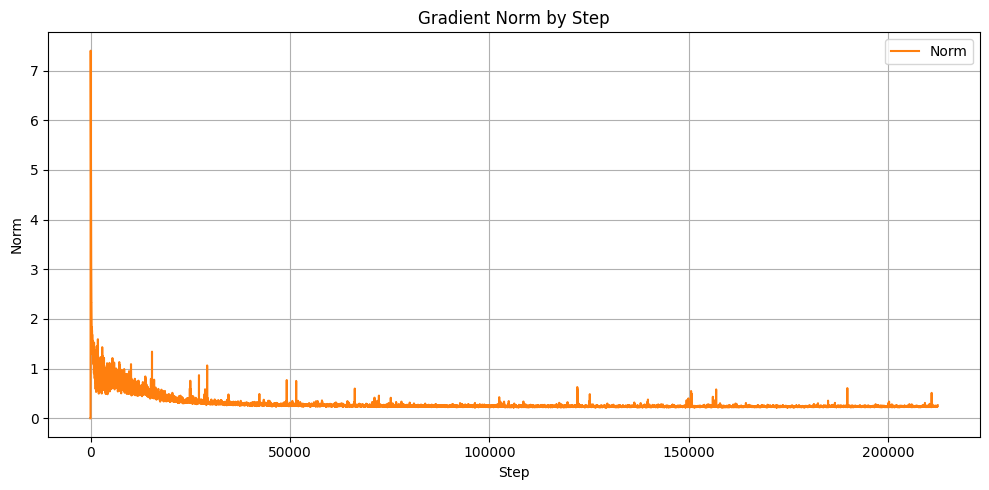

In [35]:
# Plot Norm
fig_norm, ax_norm = plt.subplots(figsize=(10, 5))
ax_norm.plot(df_metrics["step"], df_metrics["norm"], color="tab:orange", label="Norm")
ax_norm.set_xlabel("Step")
ax_norm.set_ylabel("Norm")
ax_norm.set_title("Gradient Norm by Step")
ax_norm.grid(True)
ax_norm.legend()
plt.tight_layout()
plt.show()

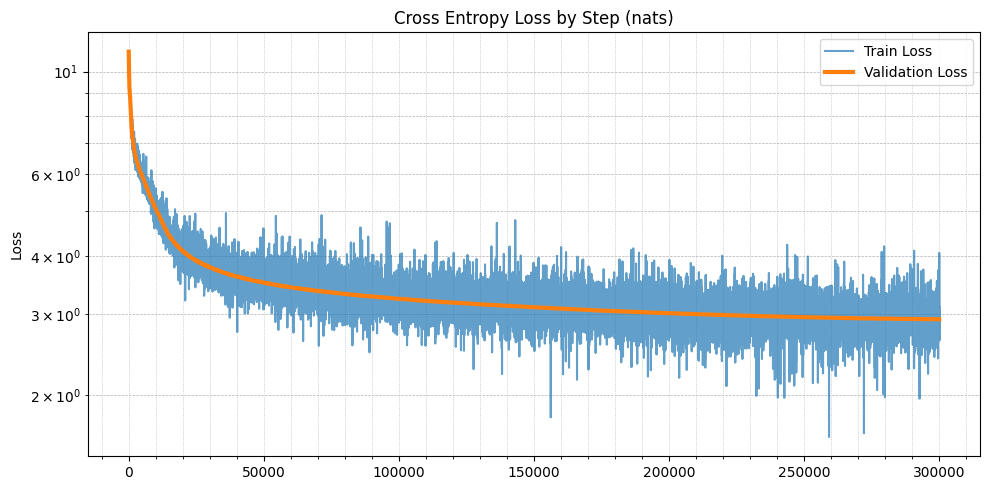

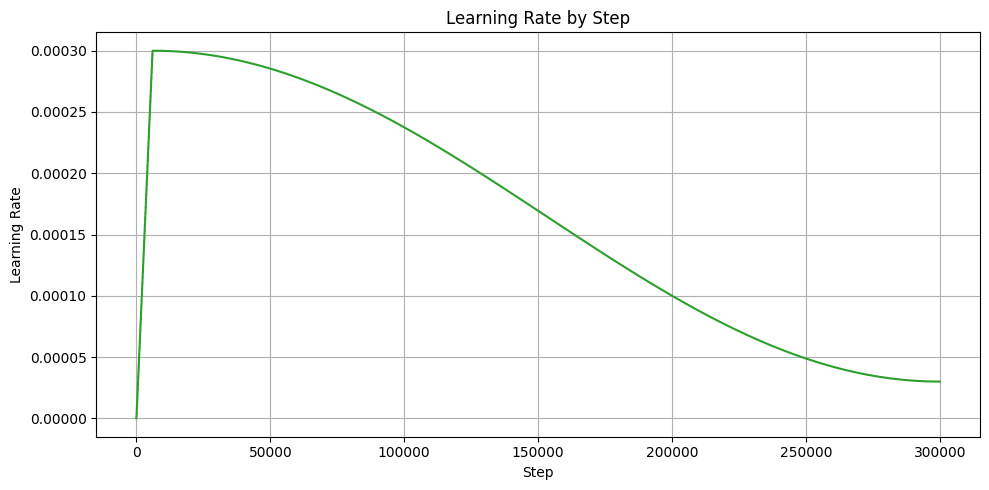

In [6]:
# Training Loss Figure


fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)

ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)

ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)
fig1.patch.set_facecolor("white")
plt.tight_layout()
plt.show()

# Learning Rate Figure
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(df_metrics["step"], df_metrics["lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.set_title("Learning Rate by Step")
ax2.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2099152/2865931867.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


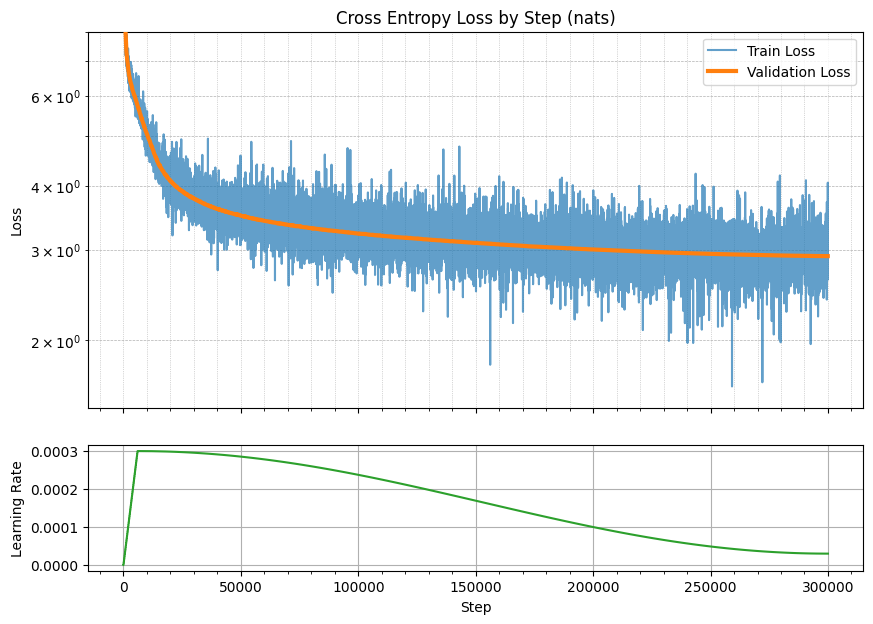

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec

# Create a figure with GridSpec to control height ratios
fig = plt.figure(figsize=(10, 7), facecolor="white")
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.15)  # loss taller, lr shorter

# --- Loss Plot ---
ax1 = fig.add_subplot(gs[0])
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)
ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)
ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_ylim(top=8.0)
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)

# Remove x-axis labels and ticks for the top plot
ax1.set_xlabel("")
ax1.tick_params(labelbottom=False)

# --- Learning Rate Plot ---
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(df_metrics["step"], df_metrics["lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.grid(True)

# Clean layout
plt.tight_layout()
plt.show()


In [18]:
# Load the contents
with open("../../logs/training_log.jsonl", "r") as f:
    train_instruct = [json.loads(line) for line in f]

df_instruct = pd.DataFrame(train_instruct)
df_instruct

,step,train_loss,val_loss,lr
0,0,2.817975,2.899097,1.000000e-07
1,16,3.354978,2.895214,1.000000e-07
2,32,2.957495,2.891265,1.000000e-07
3,48,3.114126,2.887471,1.000000e-07
4,64,3.093415,2.883736,1.000000e-07
...,...,...,...,...
197,3152,2.698486,2.343977,1.000000e-07
198,3168,3.079414,2.342999,1.000000e-07
199,3184,2.464676,2.342587,1.000000e-07
200,3200,2.456667,2.341973,1.000000e-07
